In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/rupamay/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df_raw1= pd.read_csv("IoTPond10.csv", delimiter = ",",low_memory=False)

In [3]:
df_raw1.head(5)

,created_at,entry_id,TEMPERATURE,TURBIDITY,DISOLVED OXYGEN,pH,AMMONIA,NITRATE,Population,Length,Weight
0,2021-06-25 15:48:59 CET,1,-127.0000,100,0.0,15.45166,0.0,0,50,13.45,27.6
1,2021-06-25 15:49:19 CET,2,-127.0000,100,0.0,15.45166,0.0,0,50,13.45,27.6
2,2021-06-25 15:50:16 CET,3,27.1250,100,0.0,6.01411,0.0,139,50,13.45,27.6
3,2021-06-25 15:51:50 CET,4,27.3125,100,0.0,6.03227,0.0,131,50,13.45,27.6
4,2021-06-25 15:52:10 CET,5,27.2500,100,0.0,6.03681,0.0,133,50,13.45,27.6


In [4]:
df_raw1.drop("entry_id",axis=1,inplace=True)

In [5]:
df_raw1.columns=['created_at', 'Temperature', 'Turbidity',
       'Dissolved Oxygen', 'PH', 'Ammonia', 'Nitrate', 'Population',
        'Fish_Length', 'Fish_Weight']

In [6]:
df_raw1.head(5)

,created_at,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight
0,2021-06-25 15:48:59 CET,-127.0000,100,0.0,15.45166,0.0,0,50,13.45,27.6
1,2021-06-25 15:49:19 CET,-127.0000,100,0.0,15.45166,0.0,0,50,13.45,27.6
2,2021-06-25 15:50:16 CET,27.1250,100,0.0,6.01411,0.0,139,50,13.45,27.6
3,2021-06-25 15:51:50 CET,27.3125,100,0.0,6.03227,0.0,131,50,13.45,27.6
4,2021-06-25 15:52:10 CET,27.2500,100,0.0,6.03681,0.0,133,50,13.45,27.6


In [7]:
df_raw1.dtypes

created_at           object
Temperature         float64
Turbidity             int64
Dissolved Oxygen    float64
PH                  float64
Ammonia             float64
Nitrate               int64
Population            int64
Fish_Length         float64
Fish_Weight         float64
dtype: object

<AxesSubplot:>

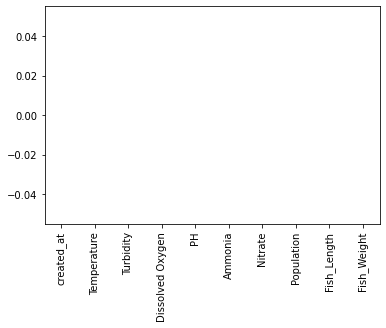

In [8]:
df_raw1.isna().sum().plot.bar()

No missing records

In [9]:
df_raw1['Datetime'] = pd.to_datetime(df_raw1.created_at,infer_datetime_format=True)

/home/rupamay/anaconda3/lib/python3.8/site-packages/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
<ipython-input-9-ddfaef0134c5>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_raw1['Datetime'] = pd.to_datetime(df_raw1.created_at,infer_datetime_format=True)


In [10]:
df_raw1.drop(columns='created_at', axis=1,inplace=True)

In [11]:
df_raw1['Date'] = df_raw1['Datetime'].dt.date
df_raw1['Time'] = df_raw1['Datetime'].dt.time

In [12]:
df_raw1.head(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time
0,-127.0000,100,0.0,15.45166,0.0,0,50,13.45,27.6,2021-06-25 15:48:59,2021-06-25,15:48:59
1,-127.0000,100,0.0,15.45166,0.0,0,50,13.45,27.6,2021-06-25 15:49:19,2021-06-25,15:49:19
2,27.1250,100,0.0,6.01411,0.0,139,50,13.45,27.6,2021-06-25 15:50:16,2021-06-25,15:50:16
3,27.3125,100,0.0,6.03227,0.0,131,50,13.45,27.6,2021-06-25 15:51:50,2021-06-25,15:51:50
4,27.2500,100,0.0,6.03681,0.0,133,50,13.45,27.6,2021-06-25 15:52:10,2021-06-25,15:52:10


Sort DataFrame by Date (Datetime)

In [13]:
df=df_raw1.sort_values(by='Datetime') 

In [14]:
# df_raw1 = df_raw1.dropna()
#clean up missing data here
# df.ffill(axis=0,inplace=True)

In [15]:
# use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime
count,620.0000,620.0000,620.0000,620.0000,620.0000,620.0000,620.0000,620.0000,620.0000,620
mean,22.1635,40.3613,2.3576,5.6573,inf,311.5581,50.0000,27.2105,282.5746,2021-07-27 22:33:21.093548544
min,-127.0000,-97.0000,0.0000,-1.9753,0.0000,0.0000,50.0000,13.4500,27.6000,2021-05-12 00:00:00
25%,26.6875,-13.0000,0.0000,6.0187,0.0000,114.0000,50.0000,15.5714,45.9214,2021-05-12 00:00:00
50%,27.1250,-9.0000,0.0000,6.0414,0.0000,193.0000,50.0000,24.1071,158.5321,2021-07-09 07:42:16
75%,27.3125,100.0000,2.3450,6.1639,0.0052,229.0000,50.0000,44.5493,689.1429,2021-10-06 12:46:56
max,31.6875,100.0000,32.4110,15.4517,inf,2473.0000,50.0000,44.5493,689.1429,2021-11-21 00:00:00
std,27.2716,58.2294,4.3990,2.0954,nan,391.1849,0.0000,13.0466,281.1059,NaN


We see some Ammonia records have values= inf , we have to drop those records.

In [16]:
# Replacing infinite with nan
df.replace([np.inf, -np.inf], np.nan, inplace=True)
  
# Dropping all the rows with nan values
df.dropna(inplace=True)

In [17]:
# use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime
count,611.0000,611.0000,611.0000,611.0000,611.0000,611.0000,611.0000,611.0000,611.0000,611
mean,22.0894,40.7774,2.3876,5.6523,217.7524,305.6481,50.0000,27.3847,286.0838,2021-07-27 20:24:07.878887168
min,-127.0000,-97.0000,0.0000,-1.9753,0.0000,0.0000,50.0000,13.4500,27.6000,2021-05-12 00:00:00
25%,26.6875,-13.0000,0.0000,6.0232,0.0000,114.0000,50.0000,15.5714,45.9214,2021-05-12 00:00:00
50%,27.1250,-3.0000,0.0000,6.0414,0.0000,193.0000,50.0000,31.7000,263.0000,2021-07-07 15:23:53
75%,27.3125,100.0000,2.3590,6.1639,0.0051,224.0000,50.0000,44.5493,689.1429,2021-10-06 12:48:17
max,31.6875,100.0000,32.4110,15.4517,35517.8789,2473.0000,50.0000,44.5493,689.1429,2021-11-21 00:00:00
std,27.4646,58.2767,4.4239,2.1099,2163.3570,380.7312,0.0000,13.0626,281.6674,NaN


So we have removed the inf values of Ammonia. There were 9 records where we had such funky values. We dropped them.

We have 611 records in total. 

In [18]:
d=df["Date"].unique()
print(len(d))
d

16


array([datetime.date(2021, 5, 12), datetime.date(2021, 6, 25),
       datetime.date(2021, 6, 26), datetime.date(2021, 6, 27),
       datetime.date(2021, 6, 28), datetime.date(2021, 6, 29),
       datetime.date(2021, 7, 7), datetime.date(2021, 7, 11),
       datetime.date(2021, 8, 12), datetime.date(2021, 8, 22),
       datetime.date(2021, 9, 24), datetime.date(2021, 10, 1),
       datetime.date(2021, 10, 6), datetime.date(2021, 10, 10),
       datetime.date(2021, 10, 24), datetime.date(2021, 11, 21)],
      dtype=object)

In [19]:
a=df["Fish_Weight"].unique()
print(len(a))
a

17


array([689.1429    ,  27.6       ,  29.63571429,  31.67142429,
        33.70713429,  35.74284429,  41.84997429,  43.88568429,
       601.8071    ,  45.92139429,  47.95710429,  49.99281429,
        52.02852429,  54.06423429, 263.        , 287.1429    ,
       617.4929    ])

So we can see there are 16 unique dates but 17 unique fish weights. This means on certain date , there were 2 readings of fish weight. Lets investigate.

In [20]:
date_group=df.groupby("Date", sort = False)

In [21]:
for i in range(len(date_group)):
    print(d[i],'-----------> ',date_group.get_group(d[i])["Fish_Weight"].unique())
    

2021-05-12 ----------->  [689.1429]
2021-06-25 ----------->  [27.6]
2021-06-26 ----------->  [29.63571429]
2021-06-27 ----------->  [31.67142429]
2021-06-28 ----------->  [33.70713429]
2021-06-29 ----------->  [35.74284429]
2021-07-07 ----------->  [41.84997429 43.88568429]
2021-07-11 ----------->  [601.8071]
2021-08-12 ----------->  [45.92139429]
2021-08-22 ----------->  [47.95710429]
2021-09-24 ----------->  [49.99281429]
2021-10-01 ----------->  [52.02852429]
2021-10-06 ----------->  [54.06423429]
2021-10-10 ----------->  [263.]
2021-10-24 ----------->  [287.1429]
2021-11-21 ----------->  [617.4929]


In [22]:
#dropping 2021-05-12 date records
i = df[df["Date"]== d[0]].index
df.drop(i,inplace=True)

In [23]:
#dropping 2021-07-11 date records
i = df[df["Date"]== d[7]].index
df.drop(i,inplace=True)

In [24]:
#dropping 2021-10-24 date records
i = df[df["Date"]== d[14]].index
df.drop(i,inplace=True)

In [25]:
#dropping 2021-10-10 date records
i = df[df["Date"]== d[13]].index
df.drop(i,inplace=True)

In [26]:
#dropping 2021-11-21 date records
i = df[df["Date"]== d[15]].index
df.drop(i,inplace=True)

In [27]:
date_group=df.groupby("Date", sort = False)

In [28]:
d=df["Date"].unique()
print(len(d))
d

11


array([datetime.date(2021, 6, 25), datetime.date(2021, 6, 26),
       datetime.date(2021, 6, 27), datetime.date(2021, 6, 28),
       datetime.date(2021, 6, 29), datetime.date(2021, 7, 7),
       datetime.date(2021, 8, 12), datetime.date(2021, 8, 22),
       datetime.date(2021, 9, 24), datetime.date(2021, 10, 1),
       datetime.date(2021, 10, 6)], dtype=object)

In [29]:
for i in range(len(date_group)):
    print(d[i],'-----------> ',date_group.get_group(d[i])["Fish_Weight"].unique())

2021-06-25 ----------->  [27.6]
2021-06-26 ----------->  [29.63571429]
2021-06-27 ----------->  [31.67142429]
2021-06-28 ----------->  [33.70713429]
2021-06-29 ----------->  [35.74284429]
2021-07-07 ----------->  [41.84997429 43.88568429]
2021-08-12 ----------->  [45.92139429]
2021-08-22 ----------->  [47.95710429]
2021-09-24 ----------->  [49.99281429]
2021-10-01 ----------->  [52.02852429]
2021-10-06 ----------->  [54.06423429]


In [30]:
#Fixing the weight 
df.loc[df["Date"] == d[5], "Fish_Weight"] = 43.885684

In [31]:
for i in range(len(date_group)):
    print(d[i],'-----------> ',date_group.get_group(d[i])["Fish_Weight"].unique())

2021-06-25 ----------->  [27.6]
2021-06-26 ----------->  [29.63571429]
2021-06-27 ----------->  [31.67142429]
2021-06-28 ----------->  [33.70713429]
2021-06-29 ----------->  [35.74284429]
2021-07-07 ----------->  [43.885684]
2021-08-12 ----------->  [45.92139429]
2021-08-22 ----------->  [47.95710429]
2021-09-24 ----------->  [49.99281429]
2021-10-01 ----------->  [52.02852429]
2021-10-06 ----------->  [54.06423429]


In [32]:
df.to_csv('Pond10.csv')

We do not have reading for an equal interval in a particular day . Also , we have missing dates where there was no reading taken between start date and end date.

In [75]:
df= pd.read_csv("Pond10.csv", delimiter = ",",low_memory=False )

In [76]:
df.drop(['Unnamed: 0'], axis=1,inplace=True)

In [77]:
df.head(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time
0,-127.0000,100,0.0,15.45166,0.0,0,50,13.45,27.6,2021-06-25 15:48:59,2021-06-25,15:48:59
1,-127.0000,100,0.0,15.45166,0.0,0,50,13.45,27.6,2021-06-25 15:49:19,2021-06-25,15:49:19
2,27.1250,100,0.0,6.01411,0.0,139,50,13.45,27.6,2021-06-25 15:50:16,2021-06-25,15:50:16
3,27.3125,100,0.0,6.03227,0.0,131,50,13.45,27.6,2021-06-25 15:51:50,2021-06-25,15:51:50
4,27.2500,100,0.0,6.03681,0.0,133,50,13.45,27.6,2021-06-25 15:52:10,2021-06-25,15:52:10


In [78]:
# use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight
count,301.0000,301.0000,301.0000,301.0000,301.0000,301.0000,301.0000,301.0000,301.000000
mean,22.0131,41.2060,2.4185,5.6471,221.0079,299.5615,50.0000,14.9019,40.145657
std,27.6848,58.3709,4.4528,2.1264,2181.1450,369.8643,0.0000,1.1930,10.304679
min,-127.0000,-97.0000,0.0000,-1.9753,0.0000,0.0000,50.0000,13.4500,27.600000
25%,26.6875,-13.0000,0.0000,6.0232,0.0000,113.0000,50.0000,13.4500,27.600000
50%,27.1250,-2.0000,0.0000,6.0414,0.0000,192.0000,50.0000,15.5714,45.921394
75%,27.3125,100.0000,2.3800,6.1639,0.0051,222.0000,50.0000,15.5714,45.921394
max,31.6875,100.0000,32.4110,15.4517,35517.8789,2473.0000,50.0000,16.5143,54.064234


301 records in total

In [79]:
d=df["Date"].unique()
print(len(d))
d

11


array(['2021-06-25', '2021-06-26', '2021-06-27', '2021-06-28',
       '2021-06-29', '2021-07-07', '2021-08-12', '2021-08-22',
       '2021-09-24', '2021-10-01', '2021-10-06'], dtype=object)

In [80]:

df['Datetime'] = pd.to_datetime(df.Datetime,infer_datetime_format=True)
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time
df['Date_diff'] = df['Date'].diff()
# df['diff'] = df['diff'].fillna(0)



In [81]:
df.head(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time,Date_diff
0,-127.0000,100,0.0,15.45166,0.0,0,50,13.45,27.6,2021-06-25 15:48:59,2021-06-25,15:48:59,NaT
1,-127.0000,100,0.0,15.45166,0.0,0,50,13.45,27.6,2021-06-25 15:49:19,2021-06-25,15:49:19,0 days
2,27.1250,100,0.0,6.01411,0.0,139,50,13.45,27.6,2021-06-25 15:50:16,2021-06-25,15:50:16,0 days
3,27.3125,100,0.0,6.03227,0.0,131,50,13.45,27.6,2021-06-25 15:51:50,2021-06-25,15:51:50,0 days
4,27.2500,100,0.0,6.03681,0.0,133,50,13.45,27.6,2021-06-25 15:52:10,2021-06-25,15:52:10,0 days


In [82]:
df['Date_diff']=df['Date_diff'].astype('timedelta64[D]')

In [83]:
df['Date_diff'] = df['Date_diff'].fillna(0)

In [84]:
df.head(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time,Date_diff
0,-127.0000,100,0.0,15.45166,0.0,0,50,13.45,27.6,2021-06-25 15:48:59,2021-06-25,15:48:59,0.0
1,-127.0000,100,0.0,15.45166,0.0,0,50,13.45,27.6,2021-06-25 15:49:19,2021-06-25,15:49:19,0.0
2,27.1250,100,0.0,6.01411,0.0,139,50,13.45,27.6,2021-06-25 15:50:16,2021-06-25,15:50:16,0.0
3,27.3125,100,0.0,6.03227,0.0,131,50,13.45,27.6,2021-06-25 15:51:50,2021-06-25,15:51:50,0.0
4,27.2500,100,0.0,6.03681,0.0,133,50,13.45,27.6,2021-06-25 15:52:10,2021-06-25,15:52:10,0.0


In [85]:
df['Date_diff'].unique()

array([ 0.,  1.,  8., 36., 10., 33.,  7.,  5.])

In [86]:
p=df[df['Date_diff']>=2]
p       

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time,Date_diff
118,25.8125,100,0.000,6.33187,129.85301,828,50,15.100000,43.885684,2021-07-07 15:15:34,2021-07-07,15:15:34,8.0
144,27.5625,-13,0.000,6.20931,0.00775,640,50,15.571429,45.921394,2021-08-12 12:59:11,2021-08-12,12:59:11,36.0
233,25.6875,-8,0.000,8.48358,8642.90918,720,50,15.807143,47.957104,2021-08-22 21:25:00,2021-08-22,21:25:00,10.0
247,31.0000,36,0.000,-1.74383,0.00266,335,50,16.042857,49.992814,2021-09-24 13:31:02,2021-09-24,13:31:02,33.0
251,26.8750,-3,0.000,-1.73022,6.20674,726,50,16.278572,52.028524,2021-10-01 11:28:43,2021-10-01,11:28:43,7.0
257,26.6250,-13,6.282,3.54010,0.00001,210,50,16.514286,54.064234,2021-10-06 12:34:22,2021-10-06,12:34:22,5.0


In [87]:
df['Weight_diff'] = df['Fish_Weight'].diff()
df['Weight_diff'] = df['Weight_diff'].fillna(0)

In [88]:
df['Weight_diff'].unique()

array([0.        , 2.03571429, 2.03571   , 2.03571   , 8.14283971,
       2.03571029, 2.03571   ])

In [89]:
date_group=df.groupby("Date", sort = False)

In [90]:
date_group.first()

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Time,Date_diff,Weight_diff
Date,,,,,,,,,,,,,
2021-06-25,-127.0000,100,0.000,15.45166,0.00000,0,50,13.450000,27.600000,2021-06-25 15:48:59,15:48:59,0.0,0.000000
2021-06-26,26.0625,100,12.435,5.97326,0.00001,0,50,13.685714,29.635714,2021-06-26 16:37:15,16:37:15,1.0,2.035714
2021-06-27,25.2500,100,0.000,6.05043,0.00000,31,50,13.921429,31.671424,2021-06-27 00:05:12,00:05:12,1.0,2.035710
2021-06-28,23.9375,100,0.000,6.16845,7.63010,2473,50,14.157143,33.707134,2021-06-28 09:35:23,09:35:23,1.0,2.035710
2021-06-29,25.1875,100,0.000,6.08220,5517.12061,1001,50,14.392857,35.742844,2021-06-29 17:26:25,17:26:25,1.0,2.035710
2021-07-07,25.8125,100,0.000,6.33187,129.85301,828,50,15.100000,43.885684,2021-07-07 15:15:34,15:15:34,8.0,8.142840
2021-08-12,27.5625,-13,0.000,6.20931,0.00775,640,50,15.571429,45.921394,2021-08-12 12:59:11,12:59:11,36.0,2.035710
2021-08-22,25.6875,-8,0.000,8.48358,8642.90918,720,50,15.807143,47.957104,2021-08-22 21:25:00,21:25:00,10.0,2.035710
2021-09-24,31.0000,36,0.000,-1.74383,0.00266,335,50,16.042857,49.992814,2021-09-24 13:31:02,13:31:02,33.0,2.035710


In [94]:
d=df["Date"].unique()
print(len(d))
d

11


array([datetime.date(2021, 6, 25), datetime.date(2021, 6, 26),
       datetime.date(2021, 6, 27), datetime.date(2021, 6, 28),
       datetime.date(2021, 6, 29), datetime.date(2021, 7, 7),
       datetime.date(2021, 8, 12), datetime.date(2021, 8, 22),
       datetime.date(2021, 9, 24), datetime.date(2021, 10, 1),
       datetime.date(2021, 10, 6)], dtype=object)

In [92]:
for i in range(len(date_group)-1):
    df.iloc[df.loc[df["Date"]==d[i]].index[0],13]=date_group.get_group(d[i+1]).Weight_diff.max()
    print(df[df["Date"]==d[i]].iloc[0,13])
    
    

2.035714289999998
2.0357100000000017
2.035709999999998
2.0357100000000017
8.142839709999997
2.0357102900000044
2.0357099999999946
2.0357100000000017
2.0357100000000017
2.0357100000000017


In [93]:
date_group=df.groupby("Date", sort = False)
date_group.first()

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Time,Date_diff,Weight_diff
Date,,,,,,,,,,,,,
2021-06-25,-127.0000,100,0.000,15.45166,0.00000,0,50,13.450000,27.600000,2021-06-25 15:48:59,15:48:59,0.0,2.035714
2021-06-26,26.0625,100,12.435,5.97326,0.00001,0,50,13.685714,29.635714,2021-06-26 16:37:15,16:37:15,1.0,2.035710
2021-06-27,25.2500,100,0.000,6.05043,0.00000,31,50,13.921429,31.671424,2021-06-27 00:05:12,00:05:12,1.0,2.035710
2021-06-28,23.9375,100,0.000,6.16845,7.63010,2473,50,14.157143,33.707134,2021-06-28 09:35:23,09:35:23,1.0,2.035710
2021-06-29,25.1875,100,0.000,6.08220,5517.12061,1001,50,14.392857,35.742844,2021-06-29 17:26:25,17:26:25,1.0,8.142840
2021-07-07,25.8125,100,0.000,6.33187,129.85301,828,50,15.100000,43.885684,2021-07-07 15:15:34,15:15:34,8.0,2.035710
2021-08-12,27.5625,-13,0.000,6.20931,0.00775,640,50,15.571429,45.921394,2021-08-12 12:59:11,12:59:11,36.0,2.035710
2021-08-22,25.6875,-8,0.000,8.48358,8642.90918,720,50,15.807143,47.957104,2021-08-22 21:25:00,21:25:00,10.0,2.035710
2021-09-24,31.0000,36,0.000,-1.74383,0.00266,335,50,16.042857,49.992814,2021-09-24 13:31:02,13:31:02,33.0,2.035710


In [95]:
dates_to_be_dropped=[]
for i in range(len(date_group)-1):
    df.iloc[df.loc[df["Date"]==d[i]].index[0],12]=date_group.get_group(d[i+1]).Date_diff.max()
    print(d[i],'------' ,df[df["Date"]==d[i]].iloc[0,12])
    if (df[df["Date"]==d[i]].iloc[0,12])>=2:
        dates_to_be_dropped.append(d[i]) 

2021-06-25 ------ 1.0
2021-06-26 ------ 1.0
2021-06-27 ------ 1.0
2021-06-28 ------ 1.0
2021-06-29 ------ 8.0
2021-07-07 ------ 36.0
2021-08-12 ------ 10.0
2021-08-22 ------ 33.0
2021-09-24 ------ 7.0
2021-10-01 ------ 5.0


In [96]:
date_group=df.groupby("Date", sort = False)
date_group.first()

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Time,Date_diff,Weight_diff
Date,,,,,,,,,,,,,
2021-06-25,-127.0000,100,0.000,15.45166,0.00000,0,50,13.450000,27.600000,2021-06-25 15:48:59,15:48:59,1.0,2.035714
2021-06-26,26.0625,100,12.435,5.97326,0.00001,0,50,13.685714,29.635714,2021-06-26 16:37:15,16:37:15,1.0,2.035710
2021-06-27,25.2500,100,0.000,6.05043,0.00000,31,50,13.921429,31.671424,2021-06-27 00:05:12,00:05:12,1.0,2.035710
2021-06-28,23.9375,100,0.000,6.16845,7.63010,2473,50,14.157143,33.707134,2021-06-28 09:35:23,09:35:23,1.0,2.035710
2021-06-29,25.1875,100,0.000,6.08220,5517.12061,1001,50,14.392857,35.742844,2021-06-29 17:26:25,17:26:25,8.0,8.142840
2021-07-07,25.8125,100,0.000,6.33187,129.85301,828,50,15.100000,43.885684,2021-07-07 15:15:34,15:15:34,36.0,2.035710
2021-08-12,27.5625,-13,0.000,6.20931,0.00775,640,50,15.571429,45.921394,2021-08-12 12:59:11,12:59:11,10.0,2.035710
2021-08-22,25.6875,-8,0.000,8.48358,8642.90918,720,50,15.807143,47.957104,2021-08-22 21:25:00,21:25:00,33.0,2.035710
2021-09-24,31.0000,36,0.000,-1.74383,0.00266,335,50,16.042857,49.992814,2021-09-24 13:31:02,13:31:02,7.0,2.035710


In [97]:
dates_to_be_dropped.append(d[len(date_group)-1])  
dates_to_be_dropped

[datetime.date(2021, 6, 29),
 datetime.date(2021, 7, 7),
 datetime.date(2021, 8, 12),
 datetime.date(2021, 8, 22),
 datetime.date(2021, 9, 24),
 datetime.date(2021, 10, 1),
 datetime.date(2021, 10, 6)]

In [98]:
# df.iloc[df.loc[df["Date_diff"]>=2.index[0],12]
# #         print(df.iloc[df.loc[df["Date"]==d[i]].index[0],12])
# #         print(d[i])
# # print(i)
i=0
for i in range(len(dates_to_be_dropped)):
    m=df.loc[df["Date"]==dates_to_be_dropped[i]].index
    df.drop(m,inplace=True)
    df.reset_index()

In [99]:
df.drop("Date_diff",axis=1,inplace=True)

In [101]:
df.to_csv('cleaned_Pond10.csv')